<a href="https://colab.research.google.com/github/rodrigorissettoterra/Machine-Learning/blob/main/Machine_Learning_Cliente_d%C3%A1_um_churn_ou_n%C3%A3o%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto: Cliente pode dar um Churn ou não?

Churn = taxa de evasão de clientes

#Preparando o ambiente

##Importando as bibliotecas necessárias

In [1]:
import pandas as pd

##Importando a base de dados

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')

###Abrindo a base de dados (5 primeiras linhas)

In [3]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


###informações sobre a base de dados

In [4]:
print('Informações sobre a base de dados:')
print('Nº de linhas: {}'.format(dados.shape[0]))
print('Nº de colunas: {}'.format(dados.shape[1]))

Informações sobre a base de dados:
Nº de linhas: 7043
Nº de colunas: 18


###Contabilizando dados faltantes ou nulos

In [5]:
dados.isnull().sum()

Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

In [6]:
dados.isna().sum()

Maior65Anos                0
Conjuge                    0
Dependentes                0
MesesDeContrato            0
TelefoneFixo               0
VariasLinhasTelefonicas    0
ServicoDeInternet          0
SegurancaOnline            0
BackupOnline               0
SeguroNoDispositivo        0
SuporteTecnico             0
TVaCabo                    0
StreamingDeFilmes          0
TipoDeContrato             0
PagamentoOnline            0
FormaDePagamento           0
ContaMensal                0
Churn                      0
dtype: int64

###Tipos de variáveis

São consideradas ***variáveis categóricas***, aquelas que são agrupadas por características em comum e por valores qualitativos.</br>
- Maior65Anos
- Conjuge,
- Dependentes,
- TelefoneFixo,
- VariasLinhasTelefonicas,
- ServicosDeInternet,
- SegurancaOnline,
- BackupOnline,
- SeguroNoDispositivo,
- SuporteTecnico,
- TVaCabo,
- StreamingDeFilmes,
- TipoDeContrato,
- PagamentoOnline,
- FormaDePagamento,
- Churn.

</br></br>São consideradas ***variáveis numéricas***, aquelas que são medidas ou um conjunto infinito de valores.</br>

- MesesDeContrato,
- ContaMensal.


###Convertendo 'Não' e 'Sim' em 0 e 1

In [7]:
traducao_dic = {
    'Sim':1,
    'Nao':0
    }

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


###Convertendo colunas com outros tipos de informações

In [8]:
dummie_dados = pd.get_dummies(dados.drop([
    'Conjuge',
    'Dependentes',
    'TelefoneFixo',
    'PagamentoOnline',
    'Churn'
    ], 
    axis =1))

dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


Ativando a visualização de todas as colunas

In [9]:
pd.set_option('display.max_columns',39)

In [10]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


##Verificando se a base de dados está balanceada

Dados desbalanceados são aqueles que possuem muitos registros para uma categoria e poucos para outra. Se não balanceamos esses dados de alguma forma, eles podem acarretar em problemas na construção de modelos e na geração de previsões.</br>
Para verificarmos se a nossa base de dados está desbalanceada, vamos gerar um gráfico que apresenta a distribuição dos valores da nossa variável classificadora "Churn":

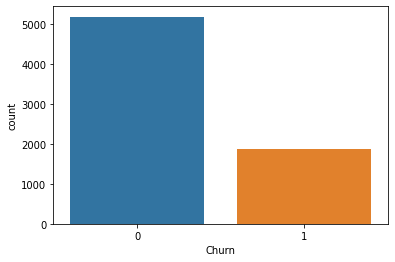

In [11]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso. Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.

Vamos dar uma olhada no trecho de código utilizado para balancear o nosso dataset com o auxílio da biblioteca imbalanced-learn e da classe SMOTE.

Caso esteja utilizando outro ambiente de desenvolvimento que não seja o Colab e seja necessário instalar a biblioteca, você pode fazê-la executando o trecho de código abaixo em alguma célula do seu notebook: 

In [12]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [14]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [15]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


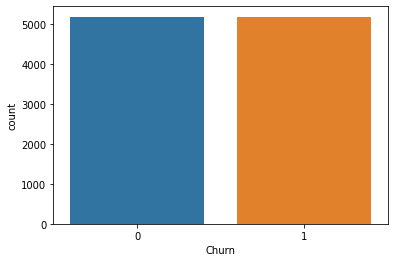

In [16]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

Ao analisarmos a variável classificadora ‘Churn’, podemos notar que há menos clientes contendo Sim - 1 do que Não - 0. Para que o aprendizado do algoritmo não seja afetado pela falta de informações referentes ao Churn de clientes que nos deixaram (Sim), foi necessário aplicar uma técnica de balanceamento.

Nesta situação, foi preferível aplicar o Oversampling por causa das quantidades de informações de clientes que a base como um todo possui. Lembrando que, quanto mais dados para treino, melhor será o aprendizado da máquina. Após a aplicação da técnica SMOTE, houve a verificação se o balanceamento funcionou adequadamente .

#K-Nearest Neighbos (KNN)

***Dados de treino***

Os dados de treino são aqueles utilizados para a criação e treinamento do modelo. Normalmente a maioria dos dados, cerca de 70%, são utilizados para treinamento.</br></br>

***Dados de teste***

Os dados de teste são utilizados para comprovar que o modelo realmente funciona. Eles não são utilizados no treinamento do modelo e normalmente representam 30% da totalidade dos dados.

Além disso, no momento de realizar a separação desses dados é importante que ela seja feita de forma aleatória, para garantirmos que não haverá nenhum padrão no momento de divisão dos dados. Assim, cada amostra terá a mesma probabilidade de ser selecionada.

Dados da cliente Maria

In [17]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

##Divisão em inputs e outputs

In [18]:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

##Padronização dos dados

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

Verificando apenas o primeiro cliente

In [21]:
X_normalizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

Normalizando os dados da cliente Maria

In [22]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

##Cálculo da distância da Maria para o cliente [0]

In [23]:
import numpy as np

In [24]:
a = Xmaria_normalizado
b = X_normalizado[0]

In [25]:
np.sqrt(np.sum(np.square(a-b)))

9.576326657950807

##Implementando o modelo

In [26]:
#Importando a biblioteca necessária para essa etapa
from sklearn.model_selection import train_test_split

In [27]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size = 0.3, random_state =123)

###Treino e teste

In [28]:
#Importando a biblioteca necessária para essa etapa
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#Instanciando o modelo - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric = 'euclidean')

In [30]:
#Treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [31]:
#Testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [32]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

In [33]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [34]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [35]:
#Referência → Mediana, pois é o valor central dos nossos dados ordenados
mediana = np.median(X_treino)

In [36]:
#Biblioteca pra criarmos o modelo de Machine Learning
from sklearn.naive_bayes import BernoulliNB

In [37]:
#Criando um modelo
bnb = BernoulliNB(binarize = mediana)

In [38]:
#treinando o modelo
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [39]:
#testando o modelo
predito_BNb = bnb.predict(X_teste)
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

#Árvore de decisão

##Importando as bibliotecas necessárias

In [40]:
from sklearn.tree import DecisionTreeClassifier

##Instanciando o modelo

In [41]:
dtc = DecisionTreeClassifier(criterion ='entropy', random_state = 42)

##Treinando o modelo

In [42]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

##Verificando a importância de cada atributo

In [43]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [44]:
predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

#Matriz de confusão

<table style="border-collapse: collapse; width: 100%;">
<tbody>
<tr>
<td style="text-align: center; width: 25%; border-style: solid; border-color: #000000;" colspan="2" rowspan="2"></td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Predito</td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;"></td>
</tr>
<tr>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Sim</td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Não</td>
</tr>
<tr>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;" rowspan="2">REAL</td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Sim</td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Verdadeiro Positivo</td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Falso Negativo</td>
</tr>
<tr>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Não</td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Falso Positivo</td>
<td style="width: 25%; text-align: center; border-style: solid; border-color: #000000;">Verdadeiro Negativo</td>
</tr>
</tbody>
</table>

##Importando as bibliotecas necessárias

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 247 1289]]


In [47]:
print(confusion_matrix(y_teste, predito_BNb))

[[1048  521]
 [ 242 1294]]


In [48]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


#Acurácia dos modelos

A acurácia é utilizada quando queremos saber a performance geral do modelo, isto é, dentre todas as classificações realizadas, quantas foram classificadas corretamente pelo modelo.

##Importando as bibliotecas necessárias

In [49]:
from sklearn.metrics import accuracy_score

##Acurácia do modelo KNN

In [50]:
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


##Acurácia do modelo Bernoulli-Naïve-Bayes

In [51]:
print(accuracy_score(y_teste, predito_BNb))

0.75426731078905


##Acurácia do modelo Árvore de decisão

In [52]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8077294685990338


##Resumo

In [53]:
print('O modelo K — Nearest Neighbors (KNN) tem uma acuária de: {}'.format(round(accuracy_score(y_teste, predito_knn)*100,3)),'%')
print('O modelo Bernoulli-Naïve-Bayes (BNB) tem uma acuária de: {}'.format(round(accuracy_score(y_teste, predito_BNb)*100,3)),'%')
print('O modelo Árvore de Decisão (Decision Tree) tem uma acuária de: {}'.format(round(accuracy_score(y_teste, predito_ArvoreDecisao)*100,3)),'%')

O modelo K — Nearest Neighbors (KNN) tem uma acuária de: 81.481 %
O modelo Bernoulli-Naïve-Bayes (BNB) tem uma acuária de: 75.427 %
O modelo Árvore de Decisão (Decision Tree) tem uma acuária de: 80.773 %


#Precisão dos modelos

A precisão é utilizada quando queremos saber dentre todas as classificações de classe Positivo realizadas pelo modelo, quantas estão corretas.

##Importando as bibliotecas necessárias

In [54]:
from sklearn.metrics import precision_score

##Precisão do modelo KNN

In [55]:
print(precision_score(y_teste,predito_knn))

0.7971552257266543


##Precisão do modelo Bernoulli-Naïve-Bayes

In [56]:
print(precision_score(y_teste,predito_BNb))

0.7129476584022039


##Precisão do modelo Árvore de decisão

In [57]:
print(precision_score(y_teste,predito_ArvoreDecisao))

0.7973400886637112


##Resumo

In [58]:
print('O modelo K — Nearest Neighbors (KNN) tem uma precisão de: {}'.format(round(precision_score(y_teste, predito_knn)*100,3)),'%')
print('O modelo Bernoulli-Naïve-Bayes (BNB) tem uma precisão de: {}'.format(round(precision_score(y_teste, predito_BNb)*100,3)),'%')
print('O modelo Árvore de Decisão (Decision Tree) tem uma precisão de: {}'.format(round(precision_score(y_teste, predito_ArvoreDecisao)*100,3)),'%')

O modelo K — Nearest Neighbors (KNN) tem uma precisão de: 79.716 %
O modelo Bernoulli-Naïve-Bayes (BNB) tem uma precisão de: 71.295 %
O modelo Árvore de Decisão (Decision Tree) tem uma precisão de: 79.734 %


#Recall

O reacll calcula o quão bom o modelo está para classificar corretamente um resultado positivo (Verdadeiro Positivo).

##Importando as bibliotecas necessárias

In [59]:
from sklearn.metrics import recall_score

##Precisão do modelo KNN

In [60]:
print(recall_score(y_teste,predito_knn))

0.8391927083333334


##Precisão do modelo Bernoulli-Naïve-Bayes

In [61]:
print(recall_score(y_teste,predito_BNb))

0.8424479166666666


##Precisão do modelo Árvore de decisão

In [62]:
print(recall_score(y_teste,predito_ArvoreDecisao))

0.8196614583333334


##Resumo

In [63]:
print('O modelo K — Nearest Neighbors (KNN) consegue prever: {}'.format(round(recall_score(y_teste, predito_knn)*100,3)),'% dos dados realmente positivos.')
print('O modelo Bernoulli-Naïve-Bayes (BNB) consegue prever: {}'.format(round(recall_score(y_teste, predito_BNb)*100,3)),'% dos dados realmente positivos.')
print('O modelo Árvore de Decisão (Decision Tree) consegue prever: {}'.format(round(recall_score(y_teste, predito_ArvoreDecisao)*100,3)),'% dos dados realmente positivos.')

O modelo K — Nearest Neighbors (KNN) consegue prever: 83.919 % dos dados realmente positivos.
O modelo Bernoulli-Naïve-Bayes (BNB) consegue prever: 84.245 % dos dados realmente positivos.
O modelo Árvore de Decisão (Decision Tree) consegue prever: 81.966 % dos dados realmente positivos.


#Qual o melhor modelo?

A validação dos modelos pode ser feita pela ***Precisão***, dado que ela mede quantos valores positivos foram previstos de forma correta. 

Segundo a medida de precisão, o melhor modelo para a nossa equipe de vendas é o ***modelo de Árvore de Decisão***, que apresentou 79,73% de acerto. 79,73% é um valor muito bom, muito interessante, entre todos os outros foi o melhor. 